In [102]:
import pandas as pd
df = pd.read_csv('../Dataset/audi_price_predict.csv', sep = ",") #where ..means 2 folders back to aim file
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [56]:
df.shape

(10668, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [8]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
df.columns.values

array(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'tax', 'mpg', 'engineSize'], dtype=object)

In [27]:
len(df['model'].unique())

26

In [28]:
df['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto'], dtype=object)

In [10]:
len(df['model'].unique())

26

In [11]:
df['year'].unique()

array([2017, 2016, 2019, 2015, 2014, 2018, 2013, 2020, 2004, 2009, 2012,
       2010, 2007, 2011, 2008, 2003, 2005, 2002, 2006, 1998, 1997],
      dtype=int64)

In [20]:
df['engineSize'].unique()

array([1.4, 2. , 1. , 3. , 1.6, 1.8, 1.5, 4. , 2.5, 1.2, 4.2, 2.9, 5.2,
       1.9, 2.7, 0. , 3.2, 4.1, 6.3])

In [21]:
# model is categoric (dummies)
# year is number
# transmission is categoric (dummies)
# price is number
# mileage is number
# fueltype is categoric (map)
# tax is number
# mpg is number
# enginesize is number

In [23]:
df.sort_values(by = 'price').head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10588,A3,2003,1490,Automatic,101000,Diesel,240,44.5,1.9
10552,A4,2004,1699,Manual,110000,Diesel,315,36.2,2.5
7795,A3,2005,1975,Manual,104000,Petrol,240,38.1,2.0
10108,TT,2002,1990,Manual,131925,Petrol,325,30.1,1.8
7404,A3,2009,2490,Manual,152034,Diesel,150,55.4,1.9
9822,A6,2008,2490,Manual,323000,Diesel,200,44.1,2.0
10158,A2,2003,2490,Manual,100000,Diesel,30,65.7,1.4
9897,A3,2005,2495,Manual,122000,Diesel,150,53.3,0.0
9359,A6,2003,2495,Manual,129000,Diesel,325,31.7,2.5
7750,A6,2003,2495,Automatic,117000,Diesel,290,39.8,2.5


In [24]:
df.sort_values(by = 'price').tail(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
7445,R8,2019,119995,Semi-Auto,7800,Petrol,145,21.4,5.2
10468,R8,2019,125000,Automatic,13663,Petrol,150,21.4,5.2
3359,R8,2019,125000,Automatic,100,Petrol,145,24.1,5.2
4925,R8,2019,125000,Semi-Auto,500,Petrol,145,21.4,5.2
1646,R8,2019,129000,Semi-Auto,4000,Petrol,145,21.4,5.2
5459,R8,2020,133900,Semi-Auto,333,Petrol,145,21.4,5.2
3367,R8,2019,135000,Automatic,1000,Petrol,145,32.8,5.2
4179,R8,2019,137500,Semi-Auto,10,Petrol,150,21.4,5.2
2255,R8,2020,137995,Semi-Auto,70,Petrol,145,21.1,5.2
4783,R8,2020,145000,Semi-Auto,2000,Petrol,145,21.1,5.2


In [29]:
print(df[df['transmission'] == 'Manual']['price'].mean())
print(df[df['transmission'] == 'Semi-Auto']['price'].mean())
print(df[df['transmission'] == 'Automatic']['price'].mean())

16101.033417257953
27161.781676413255
28204.75


In [30]:
print(df[df['transmission'] == 'Manual']['price'].median())
print(df[df['transmission'] == 'Semi-Auto']['price'].median())
print(df[df['transmission'] == 'Automatic']['price'].median())

15700.0
24250.0
26500.0


In [31]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [33]:
df['transmission'].value_counts()

Manual       4369
Semi-Auto    3591
Automatic    2708
Name: transmission, dtype: int64

In [34]:
df['fuelType'].value_counts()

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64

In [40]:
df['fuelType'].value_counts().index[0] # we can choose 1st, 2nd modes, unlike next cell

'Diesel'

In [43]:
df['fuelType'].mode() # the same as previous cell

0    Diesel
dtype: object

In [41]:
df[df['year'] == 2011].count()

model           47
year            47
price           47
transmission    47
mileage         47
fuelType        47
tax             47
mpg             47
engineSize      47
dtype: int64

In [42]:
df[df['year'] == 2020].count()

model           716
year            716
price           716
transmission    716
mileage         716
fuelType        716
tax             716
mpg             716
engineSize      716
dtype: int64

In [44]:
import matplotlib.pyplot as plt
import numpy as np

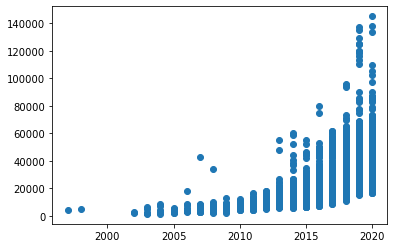

In [48]:
x = df['year']
y = df['price']
plt.scatter(x, y);

In [50]:
# df.plot.scatter(x='year', y='price'); # the same as previous cell

<AxesSubplot:>

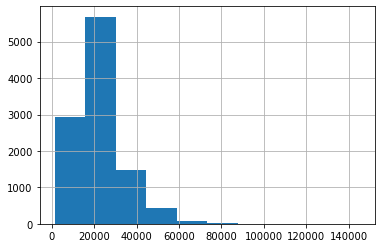

In [54]:
df['price'].hist()

In [55]:
df.columns.values

array(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'tax', 'mpg', 'engineSize'], dtype=object)

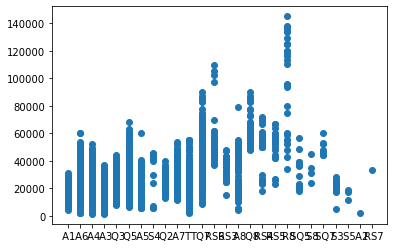

In [62]:
x = df['model']
y = df['price']
plt.scatter(x, y);

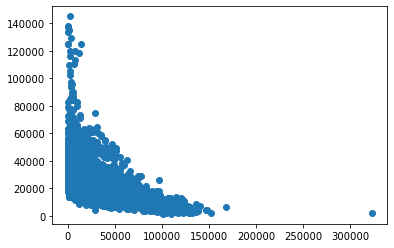

In [63]:
x = df['mileage']
y = df['price']
plt.scatter(x, y);

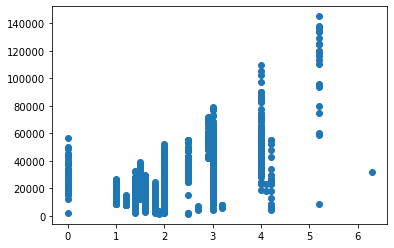

In [66]:
x = df['engineSize']
y = df['price']
plt.scatter(x, y);

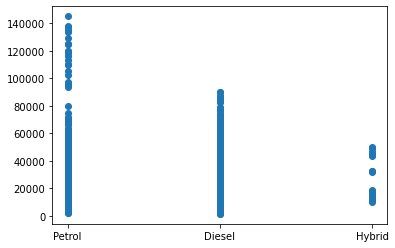

In [67]:
x = df['fuelType']
y = df['price']
plt.scatter(x, y);

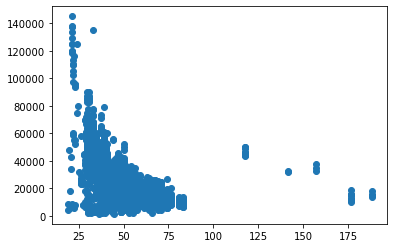

In [105]:
x = df['mpg']
y = df['price']
plt.scatter(x, y);

In [ ]:
# model is categoric (dummies)
# year is number
# transmission is categoric (dummies)
# price is number
# mileage is number
# fueltype is categoric (dummies)
# tax is number
# mpg is number
# enginesize is number

In [68]:
df.columns.values

array(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'tax', 'mpg', 'engineSize'], dtype=object)

In [57]:
df = pd.concat([df, pd.get_dummies(df['model'])], axis = 1)
df = pd.concat([df, pd.get_dummies(df['transmission'])], axis = 1)
df = pd.concat([df, pd.get_dummies(df['fuelType'])], axis = 1)

df = df.drop(columns = ['model','transmission', 'fuelType'])



In [58]:
df

,year,price,mileage,tax,mpg,engineSize,A1,A2,A3,A4,...,S8,SQ5,SQ7,TT,Automatic,Manual,Semi-Auto,Diesel,Hybrid,Petrol
0,2017,12500,15735,150,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2016,16500,36203,20,64.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2016,11000,29946,30,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2017,16800,25952,145,67.3,2.0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,2019,17300,1998,145,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,2020,16999,4018,145,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10664,2020,16999,1978,150,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10665,2020,17199,609,150,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10666,2017,19499,8646,150,47.9,1.4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [59]:
df.shape

(10668, 38)

In [74]:
# df.isnull().sum()

In [63]:
X = df.copy()
y = X.pop('price')

In [64]:
X.shape

(10668, 37)

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
Lin_Reg = LinearRegression()
Lin_Reg.fit(X_train, y_train)
Lin_Reg.score(X_train, y_train), Lin_Reg.score(X_test, y_test) 

(0.8899417241978846, 0.897633730687553)

In [81]:
Lin_Reg.predict(X_test)

array([12740.21136598, 15079.97400648, 28353.04165492, ...,
       18910.43745026, 24136.3033938 , 22643.51783638])

In [84]:
Lin_Reg.intercept_

-3596445.007114886

In [85]:
Lin_Reg.coef_

array([ 1.81000835e+03, -7.45565329e-02, -2.84581143e+01, -2.99756504e+02,
        4.49041880e+03, -1.12652179e+04,  1.27329258e-11, -1.01341681e+04,
       -9.82043057e+03, -8.53265183e+03, -8.05916538e+03, -6.80672098e+03,
       -3.41114538e+03, -1.00618848e+04, -8.65824892e+03, -4.77433080e+03,
        3.57880097e+03,  1.31934374e+04,  4.87431986e+04, -1.84447703e+03,
        1.00575097e+04,  8.96691383e+03,  1.57185792e+04,  6.91992119e+03,
       -6.43914044e+03, -3.60300675e+03, -9.80411468e+03, -1.97504493e+03,
       -1.53414035e+03,  7.47354619e+03, -7.92801823e+03,  4.05630702e+02,
       -1.01828826e+03,  6.12657562e+02, -1.11201136e+04,  2.32267397e+04,
       -1.21066261e+04])

In [86]:
y_pred = Lin_Reg.predict(X_test)

In [88]:
from sklearn.metrics import mean_squared_error, r2_score

In [89]:
mean_squared_error(y_test, y_pred)

16168727.225144284

In [90]:
r2_score(y_test, y_pred)

0.8781785256119262

In [69]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [70]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.8897411775925963, 0.8970261390677281)

In [71]:
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train), lasso.score(X_test, y_test)

(0.8897970667560139, 0.897357193424256)

In [72]:
elastic = ElasticNet()
elastic.fit(X_train, y_train)
elastic.score(X_train, y_train), elastic.score(X_test, y_test)

(0.6990719264109224, 0.7077453849103484)

In [73]:
from sklearn.tree import DecisionTreeRegressor

In [74]:
Tree = DecisionTreeRegressor()
Tree.fit(X_train, y_train)
Tree.score(X_train, y_train), Tree.score(X_test, y_test) 

(0.9990600382551521, 0.9292421211634518)

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [76]:
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)
RFR.score(X_train, y_train), RFR.score(X_test, y_test) 

(0.9940116644504453, 0.9532106813180342)

In [99]:
RFR.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [100]:
from sklearn.model_selection import RandomizedSearchCV

 
estimators = [25, 50, 100, 200, 300, 500]
max_depth = [3, 7, 12, 18, 30, 40, 60, 100]
min_samples_leaf = [1, 2, 4, 6]
min_samples_split = [2, 5, 7, 9, 11]
K_fold = 7

params_table = {'n_estimators': estimators,
              'max_depth': max_depth,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

RS = RandomizedSearchCV(estimator = RFR,
                        param_distributions = params_table,
                        n_iter = 100,
                        cv = 7,
                        n_jobs = -1)


In [101]:
%%time
RS.fit(X_train, y_train)

RS.best_params_

Wall time: 34min 4s


{'n_estimators': 200,
 'min_samples_split': 7,
 'min_samples_leaf': 1,
 'max_depth': 60}

In [21]:
RFR = RandomForestRegressor(n_estimators = 200,
                 min_samples_split = 7,
                 min_samples_leaf = 1,
                 max_depth = 60)
RFR.fit(X_train, y_train)
RFR.score(X_train, y_train), RFR.score(X_test, y_test)

(0.985631437468375, 0.9577480834859093)

In [103]:
RFR.feature_importances_

array([2.17466211e-01, 4.19918508e-02, 2.79381443e-02, 4.69807244e-01,
       1.59901814e-01, 5.65314800e-03, 0.00000000e+00, 2.47115371e-03,
       4.71650043e-03, 1.73747472e-03, 1.87944254e-03, 4.71329199e-04,
       1.10638674e-03, 7.11897997e-04, 9.68023870e-04, 4.18480942e-03,
       6.19043026e-03, 2.45775318e-03, 1.51609028e-02, 1.83488807e-04,
       2.10772429e-04, 5.65545544e-05, 2.87781779e-03, 2.28439581e-05,
       1.09595828e-05, 1.86141591e-04, 1.81682986e-06, 8.88815396e-05,
       6.46199051e-04, 4.40643045e-05, 8.92479059e-04, 6.22161613e-04,
       1.60315287e-02, 7.97110419e-04, 6.03449679e-03, 1.08373742e-03,
       5.39442918e-03])

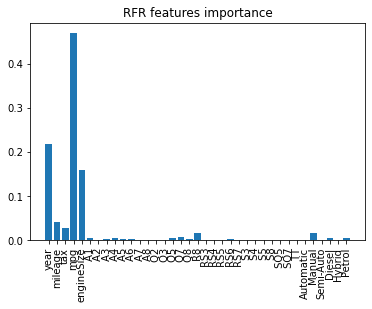

In [104]:
import matplotlib.pyplot as plt

impact = RFR.feature_importances_
values = X_train.columns.values

plt.figure()
plt.title('RFR features importance')
plt.bar(range(X_train.shape[1]), impact) # bar is because it is of good use for categoric data
plt.xticks(range(X_train.shape[1]), values, rotation = 90);

In [77]:
from sklearn.ensemble import GradientBoostingRegressor

In [78]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train, y_train)
GBR.score(X_train, y_train), GBR.score(X_test, y_test) 

(0.9495278475568673, 0.9388457174839284)

In [108]:
GBR.feature_importances_

array([2.29451878e-01, 5.09057593e-02, 1.34109459e-02, 4.20896669e-01,
       1.99277219e-01, 7.83350690e-03, 0.00000000e+00, 1.80103341e-03,
       1.42248801e-03, 8.42611734e-04, 7.28057748e-05, 1.02310399e-04,
       8.08203617e-04, 2.48845763e-04, 1.33675495e-03, 8.98392517e-03,
       6.03269773e-03, 5.12848514e-03, 1.86953991e-02, 9.29180103e-05,
       2.54222274e-04, 2.36389317e-04, 1.42099827e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.51792224e-04, 7.64442342e-05, 1.88673330e-05, 5.18398351e-05,
       2.59511001e-02, 2.91435954e-05, 4.44949482e-04, 0.00000000e+00,
       4.01979663e-03])

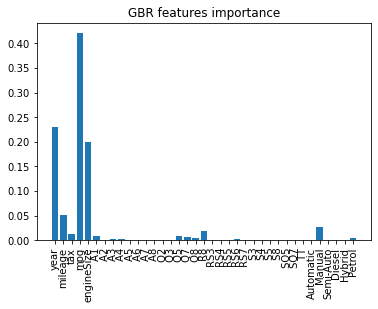

In [109]:

impact = GBR.feature_importances_
values = X_train.columns.values

plt.figure()
plt.title('GBR features importance')
plt.bar(range(X_train.shape[1]), impact) # bar is because it is of good use for categoric data
plt.xticks(range(X_train.shape[1]), values, rotation = 90);

In [ ]:
# Lin_Reg train - 0.89, test - 0.87
# Ridge train -0.89, test - 0.87
# Lasso train -0.89, test - 0.87
# Elastic_Net train 0.70, test - 0.67
#Tree train - 0.99, test - 0.93
# RFR train - 0.99, test - 0.95
# RFR with Random Search train - 0.98, test - 0.95
# GBR train - 0.95 , test - 0.93 

### Fit without train_test and real predict

In [79]:
X.head()

,year,mileage,tax,mpg,engineSize,A1,A2,A3,A4,A5,...,S8,SQ5,SQ7,TT,Automatic,Manual,Semi-Auto,Diesel,Hybrid,Petrol
0,2017,15735,150,55.4,1.4,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2016,36203,20,64.2,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2016,29946,30,55.4,1.4,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2017,25952,145,67.3,2.0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,2019,1998,145,49.6,1.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [25]:
Lin_Reg

LinearRegression()

In [26]:
print(ridge)
print(lasso)
print(elastic)

Ridge()
Lasso()
ElasticNet()


In [29]:
print(Tree)
print(RFR)
print(GBR)

DecisionTreeRegressor()
RandomForestRegressor()
GradientBoostingRegressor()


In [30]:
Lin_Reg.fit(X, y)
Lin_Reg.score(X, y)

0.891790476222225

In [80]:
Tree.fit(X, y)
Tree.score(X, y)

0.9987853307224878

In [81]:
RFR.fit(X, y)
RFR.score(X, y)

0.9937376474038316

### Predict

In [37]:
Lin_Reg_predict = Lin_Reg.predict(X)

In [82]:
real_price = df['price']
year = df['year']
mileage = df['mileage']

In [46]:
Lin_Reg_final = pd.DataFrame({'year': X['year'],
                              'mileage': X['mileage'],
                              'real_price': df['price'],
                       'predicted_price': Lin_Reg_predict})
Lin_Reg_final.to_csv('Lin_Reg_Predict.csv', index = False)

In [49]:
df = pd.read_csv('Lin_Reg_Predict.csv', sep = ",")
df.head(5)

,year,mileage,real_price,predicted_price
0,2017,15735,12500,14112.914591
1,2016,36203,16500,20556.075440
2,2016,29946,11000,14649.386931
3,2017,25952,16800,16753.597707
4,2019,1998,17300,20165.867480


In [96]:
Tree_predict = Tree.predict(X)

In [97]:
Tree_final = pd.DataFrame({'year': X['year'],
                           'mileage': X['mileage'],
                           'real_price': df['price'],
                           'predicted_price': Tree_predict})
Tree_final.to_csv('Tree_Predict.csv', index = False)

In [99]:
df = pd.read_csv('Tree_Predict.csv', sep = ",")
df.head(15)

,year,mileage,real_price,predicted_price
0,2017,15735,12500,12500.0
1,2016,36203,16500,16500.0
2,2016,29946,11000,11000.0
3,2017,25952,16800,16800.0
4,2019,1998,17300,17300.0
5,2016,32260,13900,13900.0
6,2016,76788,13250,13250.0
7,2016,75185,11750,11750.0
8,2015,46112,10200,10200.0
9,2016,22451,12000,12000.0


In [87]:
RFR_predict = RFR.predict(X)

In [92]:
RFR_final = pd.DataFrame({'year': X['year'],
                           'mileage': X['mileage'],
                           'real_price': df['price'],
                           'predicted_price': RFR_predict})
RFR_final.to_csv('RFR_Predict.csv', index = False)

In [93]:
df = pd.read_csv('RFR_Predict.csv', sep = ",")
df.head(15)

,year,mileage,real_price,predicted_price
0,2017,15735,12500,12885.33
1,2016,36203,16500,16469.49
2,2016,29946,11000,11693.15
3,2017,25952,16800,17340.45
4,2019,1998,17300,17064.56
5,2016,32260,13900,13834.78
6,2016,76788,13250,13642.04
7,2016,75185,11750,11636.54
8,2015,46112,10200,11044.51
9,2016,22451,12000,12053.69
